# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Seperate the 2 variables N and t

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial Fraction Decomposition

$\frac{1}{N(1-\frac{N}{K})} = \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}}$

Substitution and Integration

$\int \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}} dN = \int r \times dt$

Separate Integration for each term 

$\int r \times dt = rt + C_1$

$\int \frac{1}{N} dN = \ln{N} + C_2$

For $\int \frac{\frac{1}{K}}{1 - \frac{N}{K}} dN$ 

Assume $u = 1 - \frac{N}{K}$ => $du = - \frac{1}{k} dN$

$\int \frac{-du}{u} = -\ln u + C_3 = -\ln{1 - \frac{N}{K}} + C_3$

$\ln{N} - \ln{1 - \frac{N}{K}} = \ln{\frac{N}{1-\frac{N}{K}}} = rt + C$

$\frac{N}{1-\frac{N}{K}} = e^{rt + C}$

$\frac{N}{1-\frac{N}{K}}= Ae^{rt}$

Obtain the equation in terms of N

$N = Ae^{rt} \times 1 - \frac{N}{K}$

$N = Ae^{rt} - Ae^{rt} \times \frac{N}{K}$

$N + Ae^{rt} \times \frac{N}{K} = Ae^{rt}$

$N\big[1 + \frac{Ae^{rt}}{K}\big] = Ae^{rt}$

$N = \frac{Ae^{rt}}{1 + \frac{Ae^{rt}}{K}}$

To obtain a value for A, let us consider an initial condition at time $t=0$

$Ae^0 = A$

$No = \frac{A}{1 + \frac{A}{K}}$

$No = \frac{AK}{K+A}$

$No(K+A) = AK$

$NoK + NoA = AK$

$NoA - AK = -NoK$

$AK -NoA = NoK$

$A = \frac{NoK}{K - No}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (No*K)/(K-No)
N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
# t is an array, it is the same as doing it for each element
plt.plot(t, N)
plt.legend(['approximate analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()

### Part 2

Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

Using scipy.integrate package function odeint

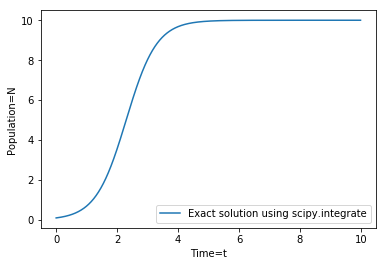

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
def f(N, t, r, K):
    """Derivative functiion"""    
    return r*N*(1-N/K)

# The order of the arguments for ode function: the derivative function, the initial condition, the points where we want 
# the solution, and a list of parameters
N = odeint(f, No, t, (r, K))

# plot the solution
plt.plot(t, N)
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
plt.show()


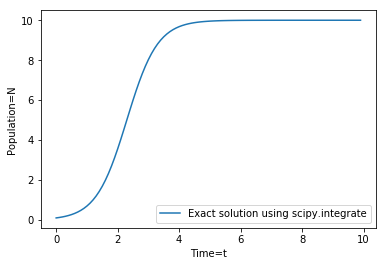

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# time steps: an array of values starting from 0 going up to 10, in steps of 0.1
t = np.arange(0, 10, 0.1)
# parameters
r = 2
K = 10
# initial condition
No = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
def f(N, t, r, K):
    """Derivative functiion"""    
    return r*N*(1-N/K)

# The order of the arguments for ode function: the derivative function, the initial condition, the points where we want 
# the solution, and a list of parameters
N = odeint(f, No, t, (r, K))

# plot the solution
plt.plot(t, N)
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
plt.show()


Eulers method

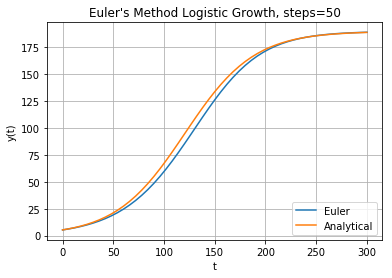

In [4]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

# limits: 0.0 <= t <= 150
a = 0
b = 300
# Number of steps
nsteps = 50
# Carrying capacity
K = 189.4
# Growth rate
r = 0.029443
# step-size
h = (b-a)/nsteps
# initial value: 
initial = (0.0,5.3)
 
# Logistic growth rate differential equation
def f(N,K,r):
    return r*N*(1-(N/K))
 
# Create arrays to hold values of t and N
t = np.arange(a,b+h,h)
narray = np.zeros((nsteps+1,))
 
# set the initial values
t[0], narray[0] = initial
 
# Apply Euler's method
for i in range(1,nsteps+1):
    narray[i] = narray[i-1] + h*f(narray[i-1], K, r)
    
# Analytical solution
def y(t):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
   
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    #return K / (1 + (((K-5.3)/5.3)*np.exp(-r*t)))
    return N

# N = 50 steps
plt.plot(t, narray, label='Euler')
plt.plot(t, y(t), label='Analytical' )
plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.grid()
plt.show()
#plt.savefig('euler_example_50steps.png', fmt='PNG', dpi=100)


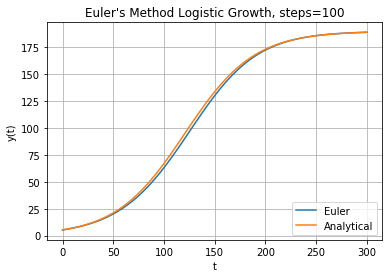

In [5]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

# limits: 0.0 <= t <= 150
a = 0
b = 300
 
# Number of steps
nsteps = 100

# Carrying capacity
K = 189.4

# Growth rate
r = 0.029443
 
# step-size
h = (b-a)/nsteps
 
# initial value: y(0.0) = 0.5
initial = (0.0,5.3)
 
# Logistic growth rate differential equation
def f(N,K,r):
    return r*N*(1-(N/K))
 
# Create arrays to hold values of t and N
t = np.arange(a,b+h,h)
narray = np.zeros((nsteps+1,))
 
# set the initial values
t[0], narray[0] = initial
 
# Apply Euler's method
for i in range(1,nsteps+1):
    narray[i] = narray[i-1] + h*f(narray[i-1], K, r)
    
# Exact solution
def y(t):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    return N
    #return K / (1 + (((K-5.3)/5.3)*np.exp(-r*t)))

# N = 100 steps
plt.plot(t, narray, label='Euler')
plt.plot(t, y(t), label='Analytical' )
plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.grid()
plt.show()
#plt.savefig('euler_example_100steps.png', fmt='PNG', dpi=100)



## Task 2

3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ)

For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, there is a system of three differential equations:

$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
def Period(state,t):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.02
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [8]:
def viewCircadianClock(result_odeint):
    fig, axes = plt.subplots(1,1, figsize=(5, 5))
    plt.plot(result_odeint[:,1], result_odeint[:,0])
    plt.xlabel("concentration of protein in cytoplasm")
    plt.ylabel("concentration of mRNA")
    plt.show()

In [9]:
def viewProductConcentrationEvolution(result_odeint, time):
    fig, axes = plt.subplots(1,1, figsize=(10, 10))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, result_odeint[:,0], 'b', time, result_odeint[:,1], 'g', time, result_odeint[:,2], 'r')
    #plt.plot(time, result_odeint[:,0], 'b')
    #plt.plot(time, result_odeint[:,1], 'g')
    #plt.plot(time, result_odeint[:,2], 'r')
    plt.legend(labels, loc='best') 
    plt.show()

#### Example1

In [10]:
state0 = [0, 0, 0]
time = np.arange(0.0, 24*100, 1)
result_odeint = odeint(Period, state0, time)

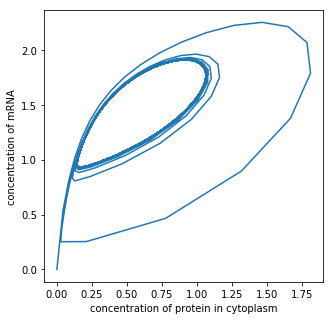

In [11]:
viewCircadianClock(result_odeint)

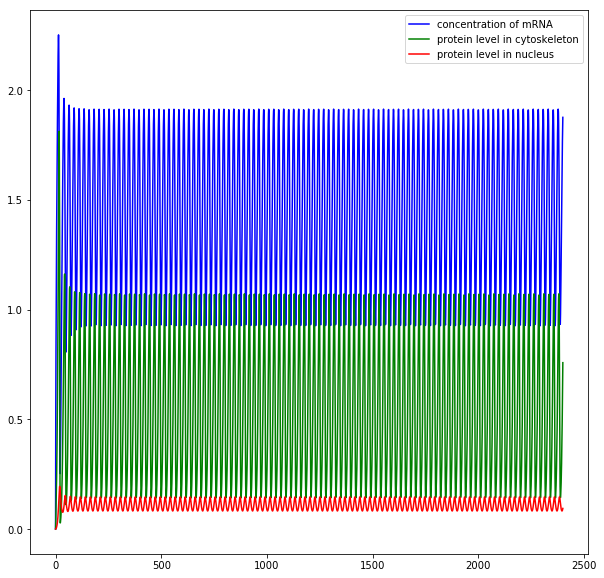

In [12]:
viewProductConcentrationEvolution(result_odeint, time)

#### Example 2

In [13]:
state0 = [0, 0, 0]
time = np.arange(0, 24*10, 1)
result_odeint = odeint(Period, state0, time)

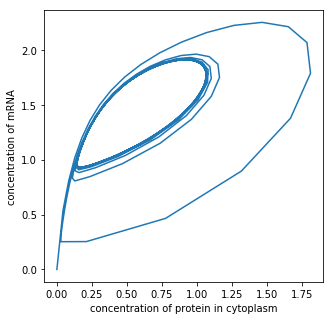

In [14]:
viewCircadianClock(result_odeint)

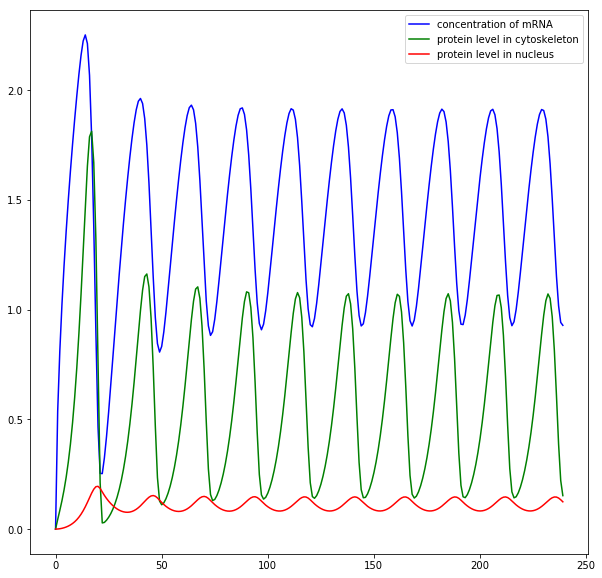

In [15]:
viewProductConcentrationEvolution(result_odeint, time)

#### Example 3

In [16]:
start = 0.0
end = 72
steps = 100
time = np.linspace(start, end, steps)
state0 = [0, 0, 0]
result_odeint = odeint(Period, state0, time)

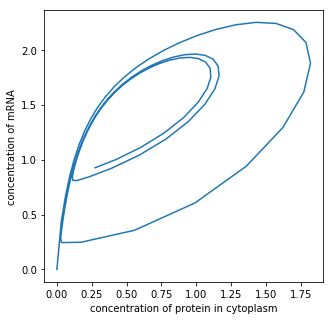

In [17]:
viewCircadianClock(result_odeint)

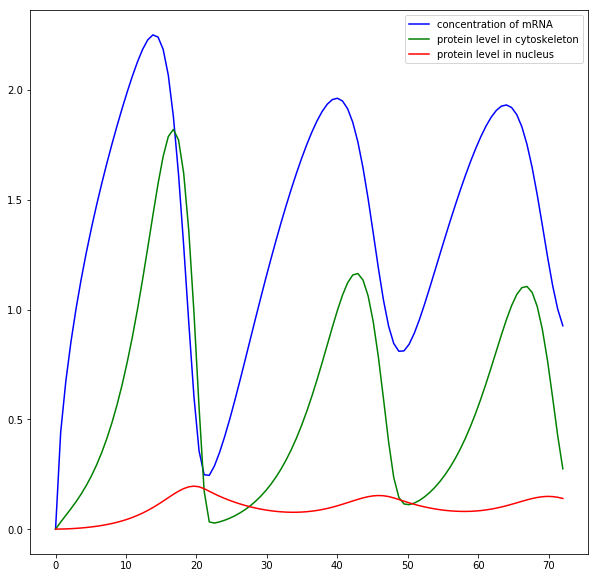

In [18]:
viewProductConcentrationEvolution(result_odeint, time)

### Part a

In [19]:
def periodWithVarying_kin(state,t, kin):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = kin
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

### Determine period by considering the protein level in cytoplasm F(t)

In [20]:
from scipy.signal import argrelextrema
def findPeriodBasedOnFc(minkin, maxkin,stepsize,state0, timeGap):
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, timeGap)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Array containing the values of M
        Farray = result_odeint[:,1]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Farray, np.greater)
         # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        #print(meanP)
        if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period)
            Ps.append((x, meanP, result_odeint, t, Farray[maxindices], t[maxindices], maxindices))
    return Ps
        

### Determine period by considering the protein level in cytoplasm  M(t)

In [21]:
from scipy.signal import argrelextrema
def findPeriodBasedOnM(minkin, maxkin,stepsize,state0, timeGap):
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, timeGap)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Array containing the values of M
        Marray = result_odeint[:,0]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Marray, np.greater)
         # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        #print(meanP)
        if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period)
            Ps.append((x,meanP, result_odeint, t))
    return Ps
        
        

In [22]:
def viewResultForPeriodsWithVarying_kin(results):
    for result in results:
        kin = result[0]
        period = result[1]
        result_odeint = result[2]
        time = result[3]
        print(kin, period)
        viewCircadianClock(result_odeint)
        viewProductConcentrationEvolution(result_odeint, time)

In [23]:
def viewResultForPeriodsForProteinWithVarying_kin(results):
    for result in results:
        kin = result[0]
        period = result[1]
        result_odeint = result[2]
        time = result[3]
        pointsWithPeaks = result[4]
        timeWithPeaks = result[5]
        maxindices = result[6]
        print(kin, period)
        fig, axes = plt.subplots(1,1, figsize=(5, 5))
        plt.plot(result_odeint[:,1], result_odeint[:,0], c = 'blue')
        #plt.plot(result_odeint[:,1][maxindices], '.', c = 'black')
        plt.xlabel("concentration of protein in cytoplasm")
        plt.ylabel("concentration of mRNA")
        plt.show()
        fig, axes = plt.subplots(1,1, figsize=(10, 10))
        labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
        plt.plot (time, result_odeint[:,0], 'blue', time, result_odeint[:,1], 'green', time, result_odeint[:,2], 'red')
        plt.plot(timeWithPeaks, pointsWithPeaks, '.', c= 'black')
        plt.legend(labels, loc='best') 
        plt.show()

Attempt 1

In [24]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
timeGap = 0.001


1
0.0244 21.5194


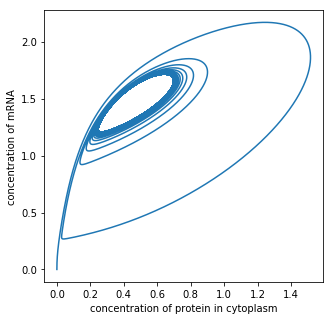

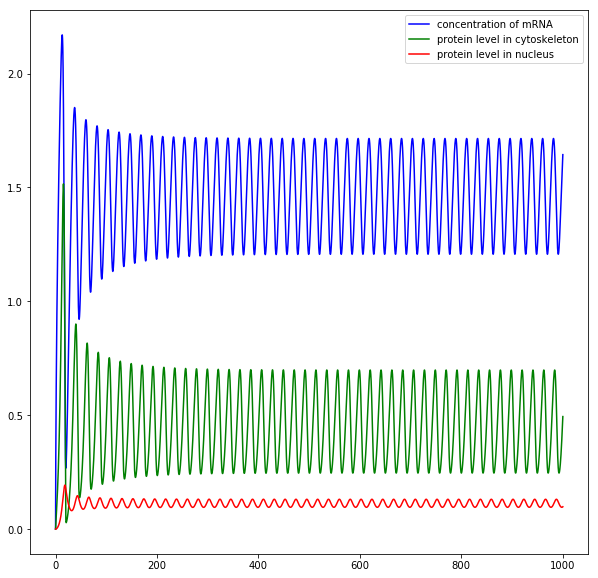

0.0244 21.5194


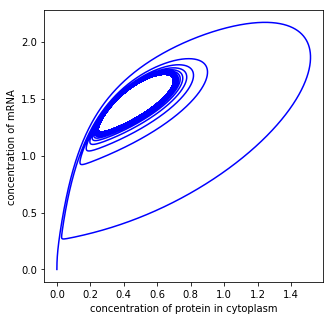

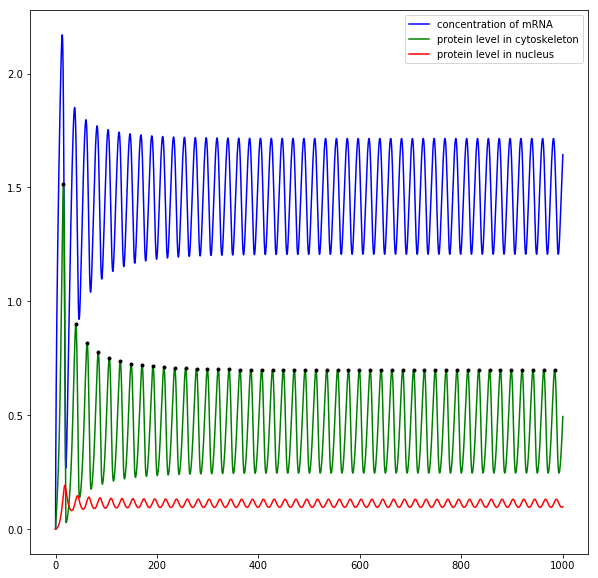

In [25]:
results = findPeriodBasedOnFc(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)
viewResultForPeriodsForProteinWithVarying_kin(results)

1
0.0244 21.5211555556


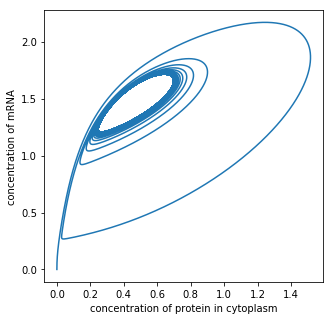

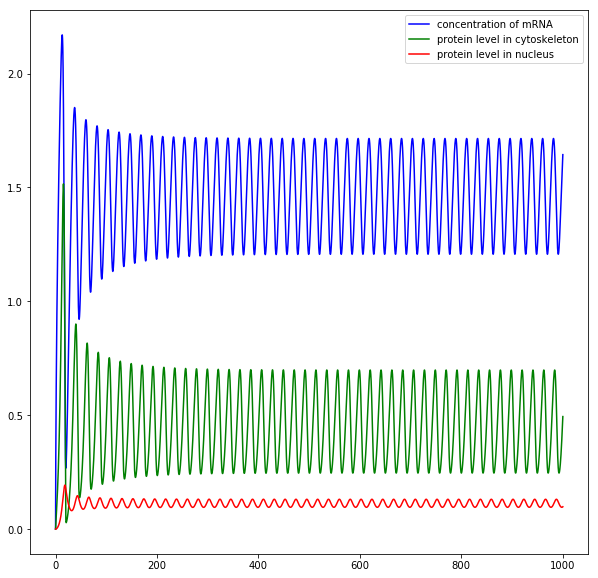

In [26]:
results = findPeriodBasedOnM(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)

Attempt 2

In [27]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
timeGap = 0.01

1
0.0244 21.5193333333


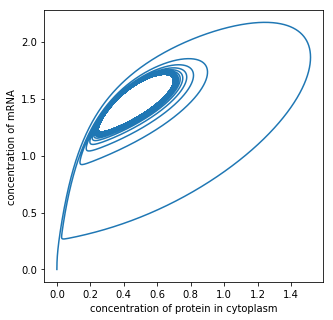

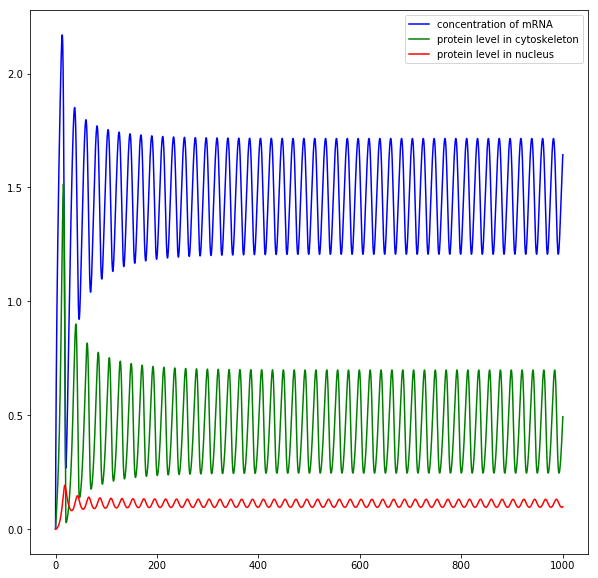

In [28]:
results = findPeriodBasedOnFc(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)

2
0.0244 21.5213333333


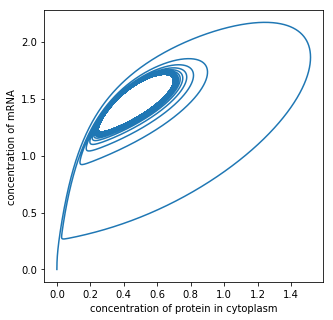

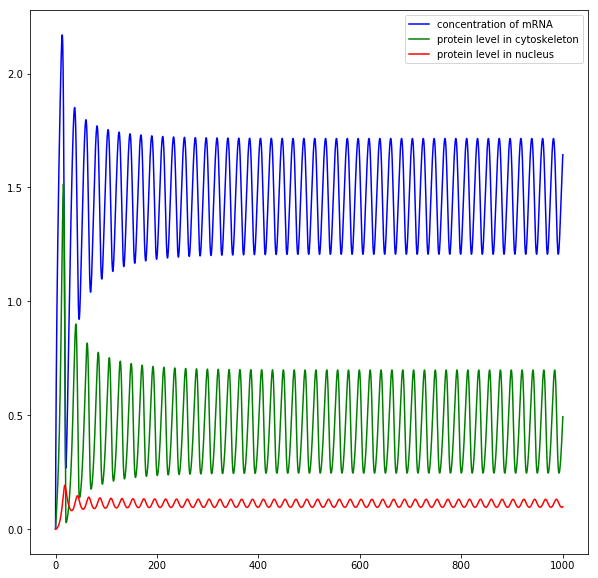

0.0451 21.5268965517


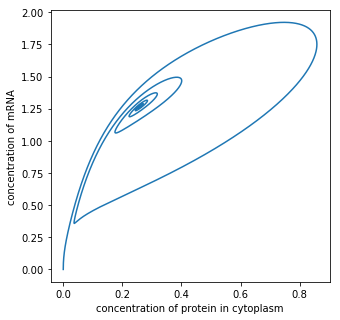

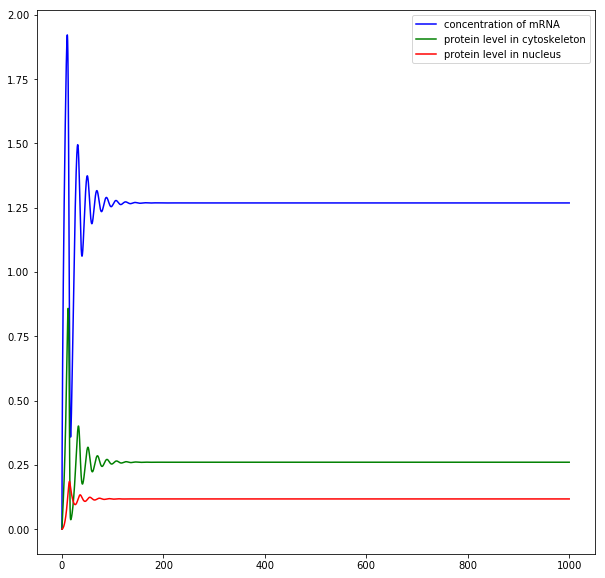

In [29]:
results = findPeriodBasedOnM(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)

### Part 2b

In [30]:
from scipy.signal import argrelextrema
def findPeriodOfClock(state0):
    h = 0.001
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    result_odeint = odeint(Period, state0, t)
    # Array containing the values of M
    Farray = result_odeint[:,1]
    # Get the indices of the maxima
    # Index represents the no. of steps from start time
    maxindices = argrelextrema(Farray, np.greater)
    # List of all timepoints where M(t) is maximum
    xlist = []
    if len(maxindices[0]) > 1:
        for item in maxindices[0]:
            xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        # Get the mean period
        meanP = np.average(differences)
    return meanP
        

In [31]:
state0 = [0, 0, 0]
periodOfClock = findPeriodOfClock(state0)
print("Period of the clock is", periodOfClock)

Period of the clock is 23.6758780488


### Part 2c

In [32]:
state0 = [0, 0, 0]
h = 0.001
starttime = 0.0
endtime = 1000
t = np.arange(starttime, endtime, h)
result_odeint = odeint(Period, state0, t)

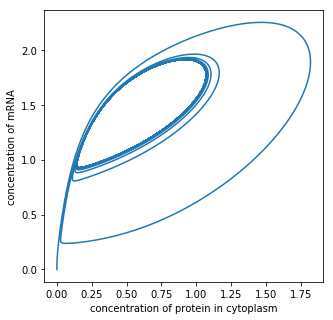

In [33]:
viewCircadianClock(result_odeint)

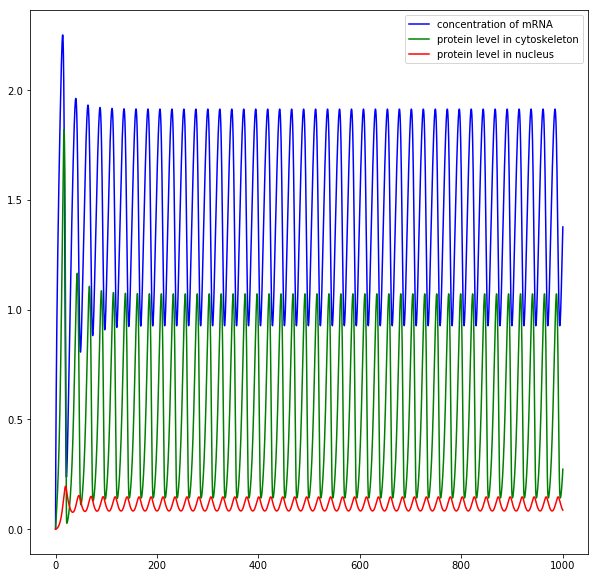

In [34]:
viewProductConcentrationEvolution(result_odeint, t)

## Task 3

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [36]:
def periodWithVarying_Vs(state, t, Vs):
     # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = Vs
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.02
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

### Task7: MAPK Networks: Compute Numerical Simulation

In [37]:
import scipy as sp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def systemOfEquations(variables, time):
    
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = variables
    
    k1 = 0.02
    k2 = 1
    k3 = 0.01
    k4 = 0.032
    k5 = 1
    k6 = 15
    k7 = 0.045
    k8 = 1
    k9 = 0.092
    k10 = 1
    k11 = 0.01
    k12 = 0.01
    k13 = 1
    k14 = 0.5
    k15 = 0.086
    k16 = 0.0011

    a1 = (k2*x6) + (k15*x11) - (k1*x1*x4) - (k16*x1*x5)
    a2 = (k3*x6) + (k5*x7) + (k10*x9) + (k13*x10) - (x2*x5*(k11 + k12)) - (k4*x2*x4)
    a3 = (k6*x7) + (k8*x8) - (k7*x3*x5)
    a4 = (x6*(k2 + k3)) + (x7*(k5 + k6)) - (k1*x1*x4) - (k4*x2*x4)
    a5 = (k8*x8) + (k10*x9) + (k13*x10) + (k15*x11) - (x2*x5*(k11 + k12)) - (k7*x3*x5) - (k16*x1*x5)
    a6 = (k1*x1*x4) - (x6*(k2 + k3))
    a7 = (k4*x2*x4) - (x7*(k5 + k6))
    a8 = (k7*x3*x5) - (x8*(k8 + k9))
    a9 = (k9*x8) - (k10*x9) + (k11*x2*x5)
    a10 = (k12*x2*x5) - (x10*(k13 + k14))
    a11 = (k14*x10) - (k15*x11) + (k16*x1*x5)

    return [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]

In [45]:
def criteriaCheck1(variables):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = variables
    if (x5 + x8 + x9 + x10 + x11 == 100) and (x4 + x6 + x7 == 50) and (x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 == 200):
        return True 
    else:
        return False


In [47]:
def criteriaCheck2(variables):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = variables
    if (x5 + x8 + x9 + x10 + x11 == 100) and (x4 + x6 + x7 == 50) and (x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 == 500):
        return True 
    else:
        return False


In [48]:
def createPlotsTask7N8(solution, t):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=360)
    axes.plot(t, solution[:, 0], "black",
              t, solution[:, 1], "green",
              t, solution[:, 2], "red",
              t, solution[:, 3], "cyan",
              t, solution[:, 4], "magenta",
              t, solution[:, 5], "yellow",
              t, solution[:, 6], "blue",
              t, solution[:, 7], "silver",
              t, solution[:, 8], "gold",
              t, solution[:, 9], "indigo",
              t, solution[:, 10], "brown")
    plt.title("MAPK Cascade")
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.show()
    

In [49]:
def evaluateTrajectories(solution, t):
    eval1 = solution[:, 0] + solution[:, 1] + solution[:, 2] + solution[:, 3] + solution[:, 4]
    eval2 = solution[:, 4] + solution[:, 7] + solution[:, 8] + solution[:, 9] + solution[:, 10]
    eval3 = solution[:, 3] + solution[:, 5] + solution[:, 6]
    eval4 = solution[:, 0] + solution[:, 1] + solution[:, 2] + solution[:, 5] + solution[:, 6] + solution[:, 7] + solution[:, 8] + solution[:, 9] + solution[:, 10]
    eval5 = solution[:, 0] + solution[:, 1] + solution[:, 2] + solution[:, 3] + solution[:, 4] + solution[:, 5] + solution[:, 6] + solution[:, 7] + solution[:, 8] + solution[:, 9] + solution[:, 10]
    figeval, axeseval = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=360)
    axeseval.plot(t, eval1, "b",t, eval2, "g",t, eval3, "r",t, eval4, "c",t, eval5, "m")
    plt.title("MAPK Cascade")
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.show()

In [52]:
#Initial condition
initial_condition = [20, 30, 30, 10, 20, 20, 20, 20, 20, 20, 20]
if criteriaCheck1(initial_condition) == True:
    t_start = 0
    t_end = 7000
    t_step = 100000
    t = np.linspace(t_start, t_end, t_step)
    solution = integrate.odeint(systemOfEquations, initial_condition, t)
    createPlotsTask7N8(solution, t)
    evaluateTrajectories(solution,t)
else:
    print("Wrong set of inputs")

Wrong set of inputs


### Bertini